In [ ]:
 from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/MyDrive/Migraine_Classification

/gdrive/MyDrive/Migraine_Classification


In [ ]:
ls

data.csv


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [ ]:
df_train=pd.read_csv('data.csv')
df_train.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [ ]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.470000,0.987500,0.322500,0.977500,0.980000,1.487500,0.302500,0.037500,0.002500,0.125000,0.060000,0.015000,0.005000,0.015000,0.000000,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.768490,0.111242,0.468019,0.148489,0.140175,0.991110,0.609855,0.190221,0.050000,0.331133,0.237784,0.121705,0.070622,0.121705,0.000000,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


# EDA

In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_train.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [ ]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [ ]:
binary_cols

['Nausea',
 'Vomit',
 'Phonophobia',
 'Photophobia',
 'Dysphasia',
 'Dysarthria',
 'Vertigo',
 'Tinnitus',
 'Hypoacusis',
 'Diplopia',
 'Defect',
 'Conscience',
 'Paresthesia',
 'DPF']

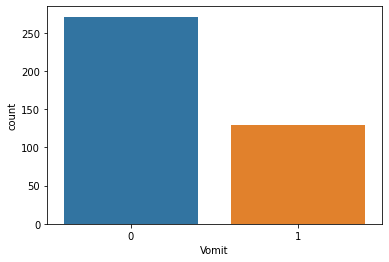

In [ ]:
sns.countplot("Vomit", data=df_train)

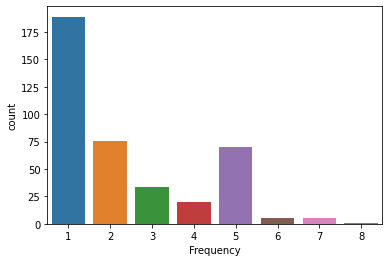

In [ ]:
sns.countplot("Frequency", data=df_train) 

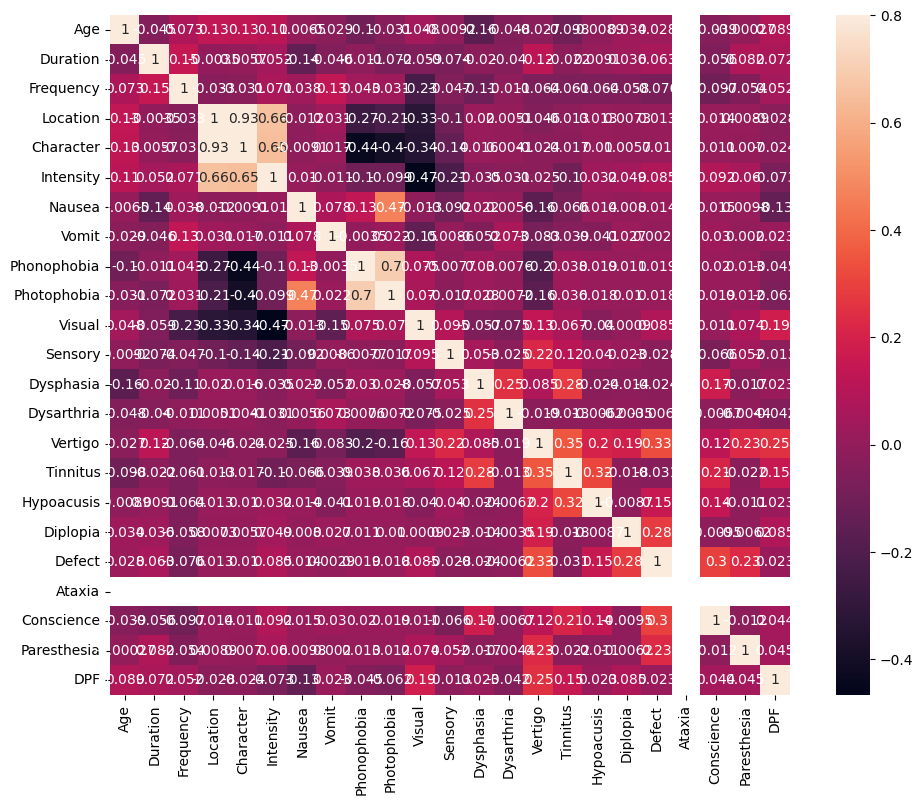

In [ ]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

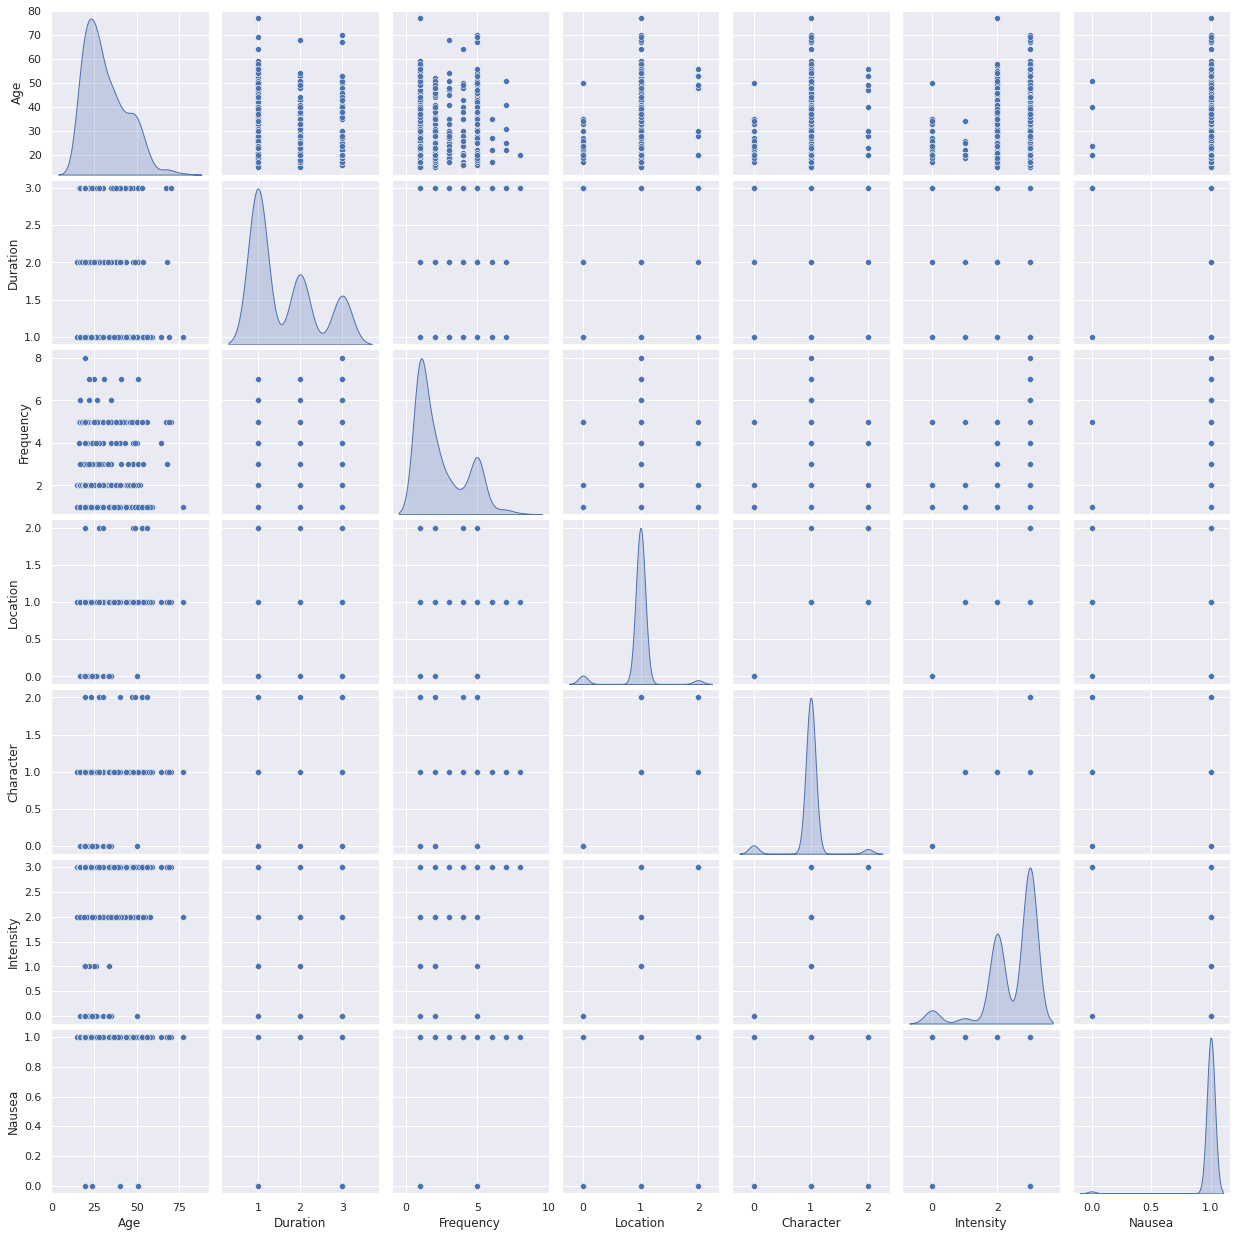

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [ ]:
X = df_train.drop(['Type'], axis = 1)
Y = df_train["Type"]
x_Data = X.values
y_Data = Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.9625

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.90625  0.921875 0.953125 0.921875 0.953125]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.940625

In [ ]:
confusion_matrix(y_train, pred)

array([[  8,   3,   0,   0,   1,   0,   0],
       [  0,  12,   0,   0,   0,   9,   0],
       [  0,   0,  47,   0,   0,   0,   0],
       [  0,   0,   1,  12,   0,   0,   0],
       [  0,   0,   0,   0,   9,   3,   0],
       [  1,   1,   0,   0,   0, 196,   0],
       [  0,   0,   0,   0,   0,   0,  17]])

In [ ]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, predicted_test))

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00         6
 Familial hemiplegic migraine       1.00      1.00      1.00         3
        Migraine without aura       1.00      1.00      1.00        13
                        Other       1.00      1.00      1.00         4
 Sporadic hemiplegic migraine       0.33      0.50      0.40         2
   Typical aura with migraine       0.98      0.96      0.97        49
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.96        80
                    macro avg       0.90      0.92      0.91        80
                 weighted avg       0.97      0.96      0.97        80



In [ ]:
cma = confusion_matrix(y_test, predicted_test)

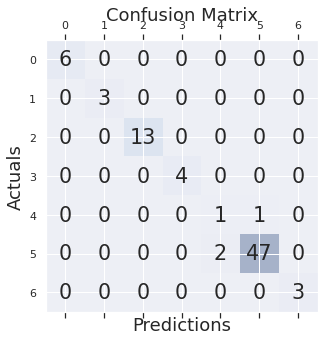

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rf

In [ ]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.96875

In [ ]:
confusion_matrix(y_train, pred)

array([[ 12,   0,   0,   0,   0,   0,   0],
       [  0,  14,   0,   0,   0,   7,   0],
       [  0,   0,  47,   0,   0,   0,   0],
       [  0,   0,   1,  12,   0,   0,   0],
       [  0,   0,   0,   0,  10,   2,   0],
       [  0,   0,   0,   0,   0, 198,   0],
       [  0,   0,   0,   0,   0,   0,  17]])

In [ ]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, pred_test))

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.50      0.67         6
 Familial hemiplegic migraine       1.00      0.33      0.50         3
        Migraine without aura       0.87      1.00      0.93        13
                        Other       1.00      0.75      0.86         4
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.89      0.98      0.93        49
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.89        80
                    macro avg       0.82      0.65      0.70        80
                 weighted avg       0.89      0.89      0.87        80



In [ ]:
cma = confusion_matrix(y_test, pred_test)

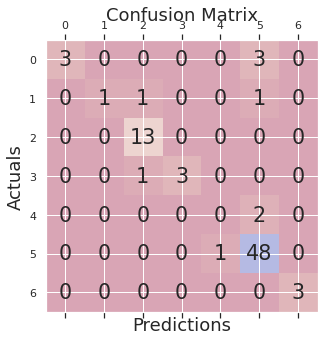

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn import tree

In [ ]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [ ]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [ ]:
confusion_matrix(y_train, pred1)

array([[ 12,   0,   0,   0,   0,   0,   0],
       [  0,  21,   0,   0,   0,   0,   0],
       [  0,   0,  47,   0,   0,   0,   0],
       [  0,   0,   0,  13,   0,   0,   0],
       [  0,   0,   0,   0,  12,   0,   0],
       [  0,   0,   0,   0,   0, 198,   0],
       [  0,   0,   0,   0,   0,   0,  17]])

In [ ]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [ ]:
print(classification_report(y_test, pred1_test))

                               precision    recall  f1-score   support

            Basilar-type aura       0.71      0.83      0.77         6
 Familial hemiplegic migraine       0.00      0.00      0.00         3
        Migraine without aura       0.81      1.00      0.90        13
                        Other       0.00      0.00      0.00         4
 Sporadic hemiplegic migraine       0.25      0.50      0.33         2
   Typical aura with migraine       0.96      0.96      0.96        49
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.86        80
                    macro avg       0.53      0.61      0.57        80
                 weighted avg       0.82      0.86      0.84        80



In [ ]:
cma = confusion_matrix(y_test, pred1_test)

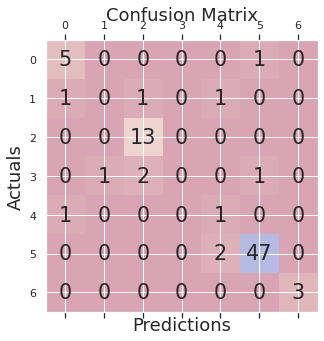

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.934375

In [ ]:
confusion_matrix(y_train, pred_LR)

array([[  9,   1,   1,   0,   0,   1,   0],
       [  0,  12,   0,   0,   0,   9,   0],
       [  0,   0,  47,   0,   0,   0,   0],
       [  0,   0,   1,  10,   0,   2,   0],
       [  0,   0,   2,   0,   6,   4,   0],
       [  0,   0,   0,   0,   0, 198,   0],
       [  0,   0,   0,   0,   0,   0,  17]])

In [ ]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [ ]:
print(classification_report(y_test, pred_LR_test))

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         6
 Familial hemiplegic migraine       1.00      1.00      1.00         3
        Migraine without aura       1.00      1.00      1.00        13
                        Other       0.80      1.00      0.89         4
 Sporadic hemiplegic migraine       0.50      0.50      0.50         2
   Typical aura with migraine       0.96      0.98      0.97        49
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.95        80
                    macro avg       0.89      0.88      0.88        80
                 weighted avg       0.95      0.95      0.95        80



In [ ]:
cma = confusion_matrix(y_test, pred_LR_test)

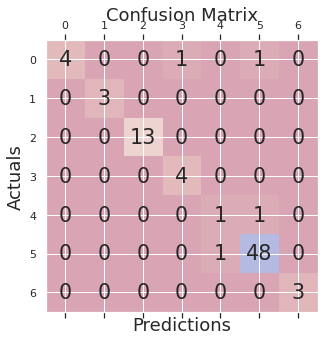

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.61875

In [ ]:
confusion_matrix(y_train, pred_NN)

array([[  0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   0,   0,   0,  21,   0],
       [  0,   0,   0,   0,   0,  47,   0],
       [  0,   0,   0,   0,   0,  13,   0],
       [  0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   0,   0,   0, 198,   0],
       [  0,   0,   0,   0,   0,  17,   0]])

In [ ]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [ ]:
print(classification_report(y_test, pred_NN_test))

                               precision    recall  f1-score   support

            Basilar-type aura       0.00      0.00      0.00         6
 Familial hemiplegic migraine       0.00      0.00      0.00         3
        Migraine without aura       0.00      0.00      0.00        13
                        Other       0.00      0.00      0.00         4
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.61      1.00      0.76        49
Typical aura without migraine       0.00      0.00      0.00         3

                     accuracy                           0.61        80
                    macro avg       0.09      0.14      0.11        80
                 weighted avg       0.38      0.61      0.47        80



In [ ]:
cma = confusion_matrix(y_test, pred_NN_test)

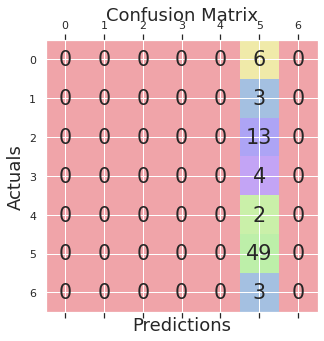

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.984375

In [ ]:
confusion_matrix(y_train, pred_XGB)

array([[ 12,   0,   0,   0,   0,   0,   0],
       [  0,  19,   0,   0,   0,   2,   0],
       [  0,   0,  47,   0,   0,   0,   0],
       [  0,   0,   1,  12,   0,   0,   0],
       [  0,   0,   0,   0,  10,   2,   0],
       [  0,   0,   0,   0,   0, 198,   0],
       [  0,   0,   0,   0,   0,   0,  17]])

In [ ]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [ ]:
print(classification_report(y_test, pred_XGB_test))

                               precision    recall  f1-score   support

            Basilar-type aura       0.75      0.50      0.60         6
 Familial hemiplegic migraine       0.50      0.67      0.57         3
        Migraine without aura       0.93      1.00      0.96        13
                        Other       1.00      0.75      0.86         4
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.94      0.98      0.96        49
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.90        80
                    macro avg       0.73      0.70      0.71        80
                 weighted avg       0.89      0.90      0.89        80



In [ ]:
cma = confusion_matrix(y_test, pred_XGB_test)

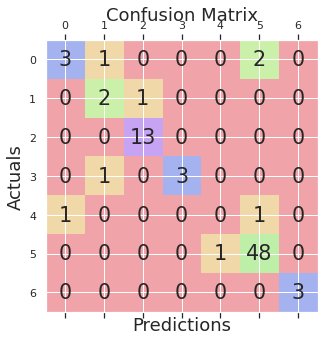

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

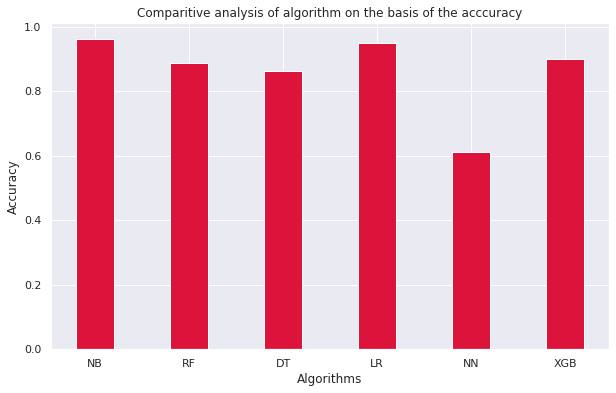

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


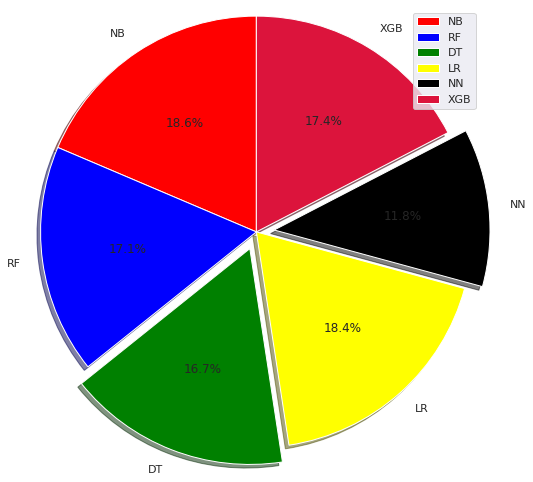

In [ ]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [ ]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']